In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




In [2]:
hidden_states = np.load("../data/encoded_states.npy")
train_targets = np.load("../data/simulated/train_targets.npy")

In [3]:
original_states = np.load("../drawing/simulated/train_decoder_states.npy")
original_latent = np.load("../drawing/simulated/latent/train_latent.npy")
print(original_states.shape)
print(original_latent.shape)

(8, 2, 5600, 100)
(8, 5600, 3)


In [4]:
where_zero = np.where(train_targets == 0)[0]
where_one = np.where(train_targets == 1)[0]
where_two = np.where(train_targets == 2)[0]

In [12]:
n_which_2 = 2
which_2 = [0]*n_which_2

for i in range(n_which_2):
    start = 40
    if (i%2) == 1:
        which_2[i] = [int(where_zero[start+i]), "proton"]
    else:
        which_2[i] = [int(where_one[start+i]), "carbon"]

In [6]:
which_2

[[89, 'carbon'], [135, 'proton']]

<IPython.core.display.Javascript object>


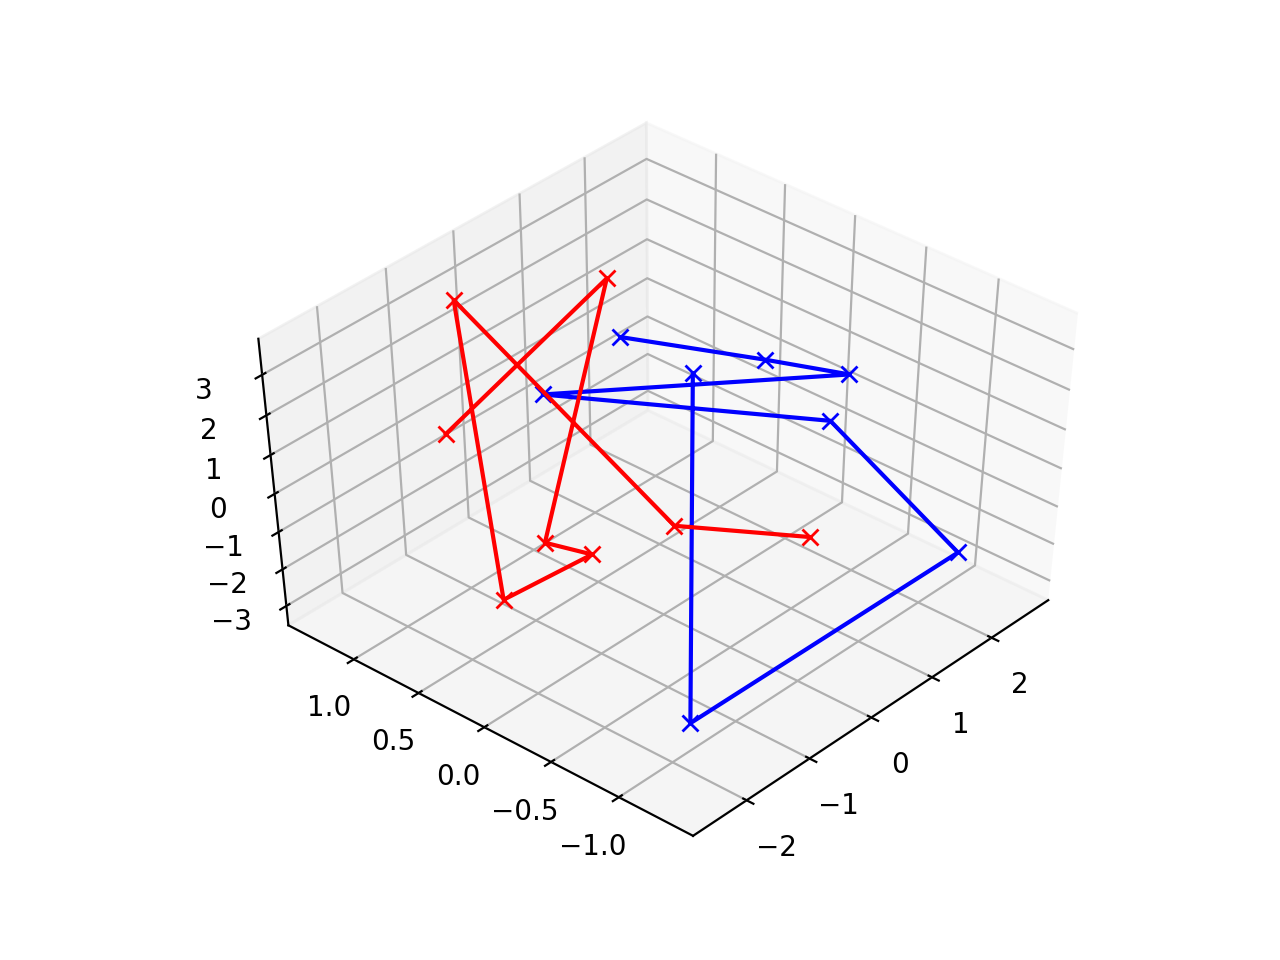

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
events = [(original_latent[:, i, :], type_event) for i, type_event in which_2]


for event, type_event in events: 
    x = event[:, 0]
    y = event[:, 1]
    z = event[:, 2]
    color = "x-r" if type_event == "proton" else "x-b"
    ax.plot(x, y, z, color)

In [8]:
encoder = keras.models.load_model("../models/state_encoder.h5")

NameError: name 'keras' is not defined

In [ ]:
which = range(30,35)
select_events = hidden_states[:, which, :]
labels = targets[which]

print(np.max(hidden_states), np.min(hidden_states), np.std(hidden_states))

fig = plt.figure()
ax = fig.add_subplot(111, )

for i in range(select_events.shape[1]):
    x = select_events[:, i, 0]
    y = select_events[:, i, 1]
    
    label = labels[i]
    color = "b" if label else "r"
    
    ax.plot(x, y, color, alpha=0.4)
    #ax.plot(x, y, z)

plt.tight_layout()